In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [15]:
# Read Files
df = pd.read_excel('data.xlsx')

df.head()

# Separate the features (X) and target variable (y)
X = df.drop('DroppedOut', axis=1)
y = df['DroppedOut']
# Convert y to a numpy array
y = np.array(y)

# Perform z-score normalization on the features 
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [16]:
# Lists to store the metrics of each fold
confusion_matrices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform stratified K-fold cross-validation with 8 folds
skf = StratifiedKFold(n_splits=8)

# Train a Random Forest classifier on each fold
rf = RandomForestClassifier()

for train_index, test_index in skf.split(X_normalized, y):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the Random Forest classifier
    rf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = rf.predict(X_test)
    
    # Compute the confusion matrix and store it in the list
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    
    # Compute the metrics and store them in the lists
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

In [17]:
# Print the confusion matrices
for i, cm in enumerate(confusion_matrices):
    print(f"Confusion matrix for fold {i+1}:\n", cm)
    
# Compute the macro averages
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics
print("Model Accuracy:", np.mean(accuracies))
print("Weighted Average Precision:", np.mean(precisions))
print("Weighted Average Recall:", np.mean(recalls))
print("Weighted Average F1-score:", np.mean(f1_scores))
print("Macro Average Precision:", macro_precision)
print("Macro Average Recall:", macro_recall)
print("Macro Average F1-score:", macro_f1)

Confusion matrix for fold 1:
 [[155   9]
 [  9  48]]
Confusion matrix for fold 2:
 [[154  10]
 [  9  48]]
Confusion matrix for fold 3:
 [[154  10]
 [ 14  43]]
Confusion matrix for fold 4:
 [[157   7]
 [ 10  47]]
Confusion matrix for fold 5:
 [[156   8]
 [ 12  45]]
Confusion matrix for fold 6:
 [[153  11]
 [  8  49]]
Confusion matrix for fold 7:
 [[154  10]
 [  9  48]]
Confusion matrix for fold 8:
 [[153  11]
 [ 14  42]]
Model Accuracy: 0.9088723776223777
Weighted Average Precision: 0.9084842595082037
Weighted Average Recall: 0.9088723776223777
Weighted Average F1-score: 0.9085011039556259
Macro Average Precision: 0.854310247429669
Macro Average Recall: 0.8414634146341464
Macro Average F1-score: 0.8475567504642589


In [18]:
# Assuming `rf` is your trained RandomForestClassifier
feature_importances = rf.feature_importances_

# Assuming `feature_names` is a list of your feature names
feature_importances_df = pd.DataFrame({
    'Feature': X.columns.tolist(),
    'Importance': feature_importances
})

# You can then sort the DataFrame to see the features with the highest importance
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

print(feature_importances_df)

                            Feature  Importance
18  ContinuousAbsenceSinceLastLogin    0.244140
30            AttendedSessionsCount    0.103631
26               NumPassedWorkshops    0.098793
28   NumWorkshopsWithNullPassStatus    0.061037
19                          Awarded    0.054772
24         NumOfAttemptedActivities    0.051832
29        TotalNumEnrolledWorkshops    0.049274
17                   RegularPresent    0.048164
33         NotRecordedSessionsCount    0.040684
27            NumWithdrawnWorkshops    0.033970
31         NotAttendedSessionsCount    0.033602
20                              New    0.031667
0                 AgeAtregistration    0.023840
23                          Working    0.023685
32             ExcusedSessionsCount    0.021170
5                SocioeconomicScore    0.015122
3                      FamilyIncome    0.011191
25               NumFailedWorkshops    0.010436
1                               Sex    0.008824
22                         Rejected    0

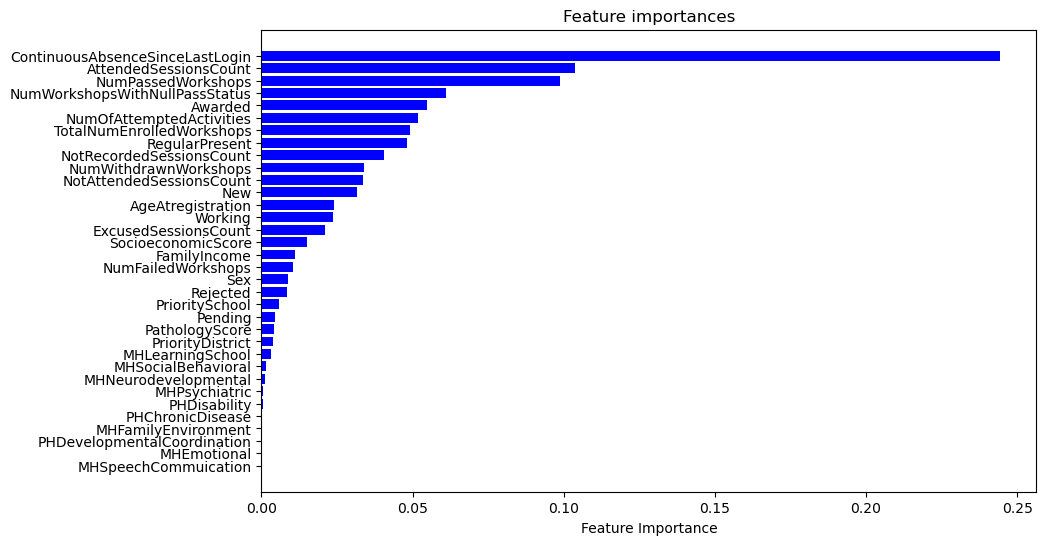

In [19]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='b', align='center')
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()

# Save the plot as a PNG file
plt.savefig('../visualizations/featureimp-random-forest.png', bbox_inches='tight')

plt.show()

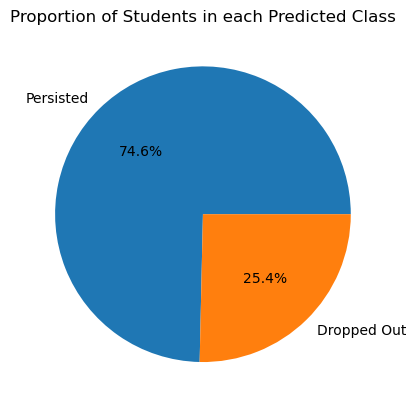

In [13]:
import matplotlib.pyplot as plt

# Count the number of students in each class
class_counts = df['DroppedOut'].value_counts()

# Change the class labels
class_counts.index = ['Persisted', 'Dropped Out']

# Create a pie chart of the counts
class_counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Proportion of Students in each Predicted Class')
plt.ylabel('')  # This line removes the y-axis label for the pie chart

# Save the figure
plt.savefig('pie_chart.png', bbox_inches='tight')

plt.show()


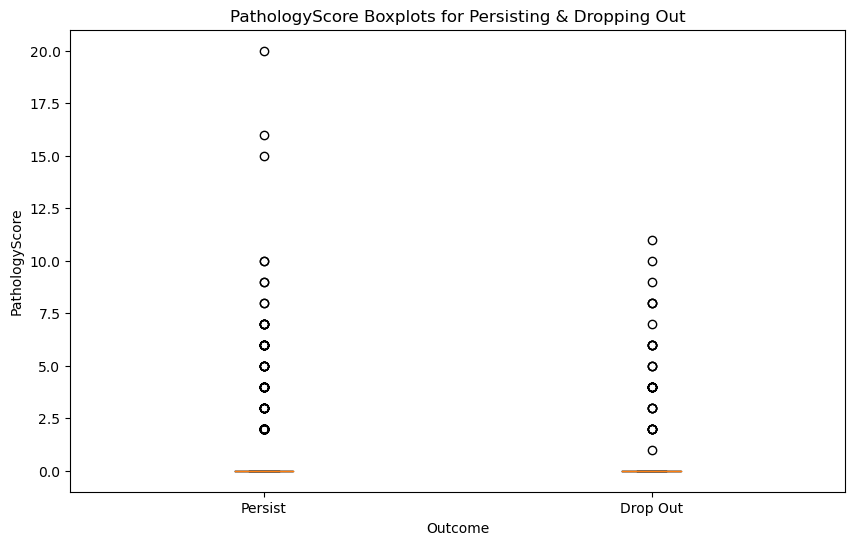

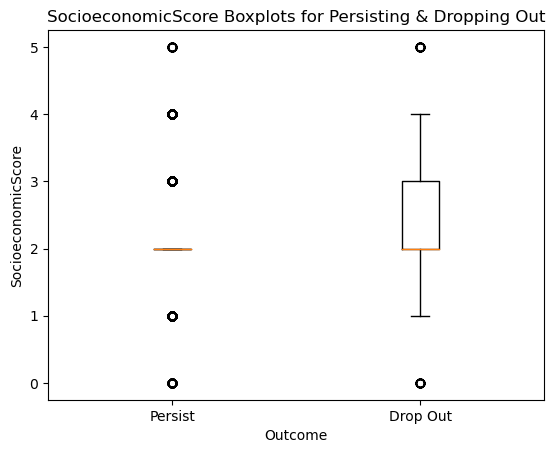

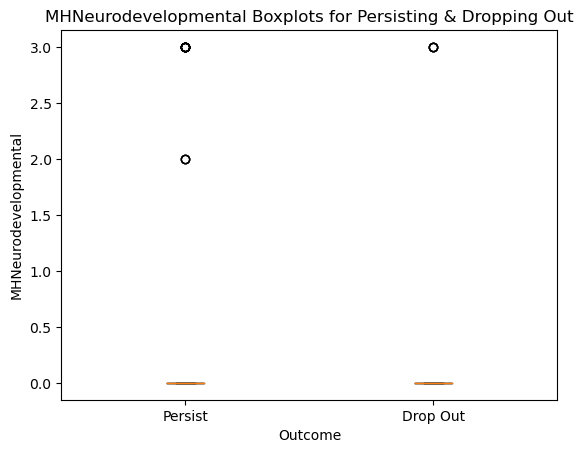

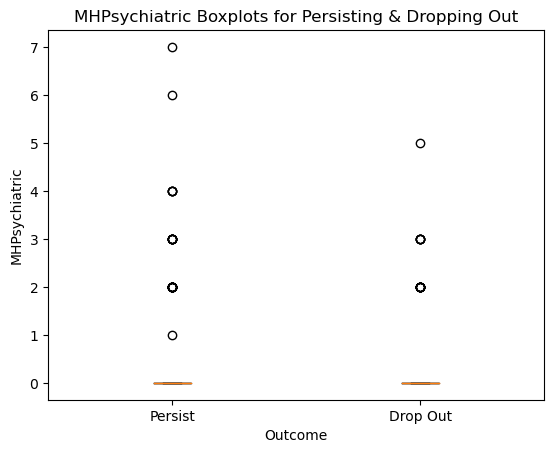

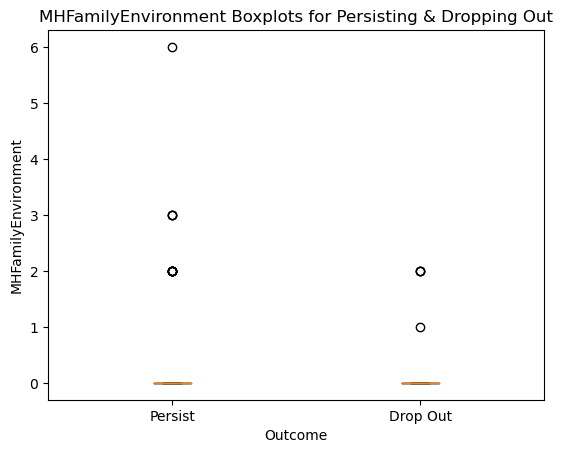

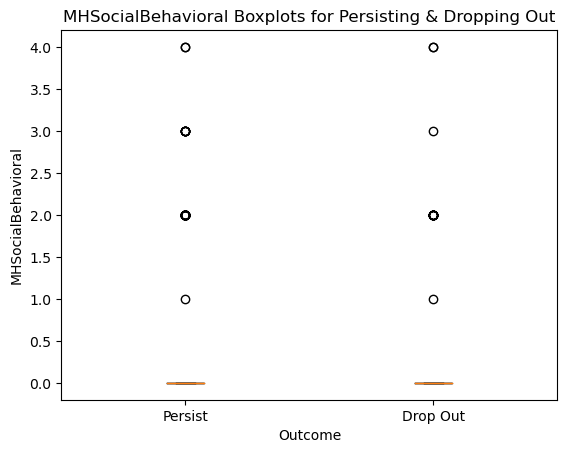

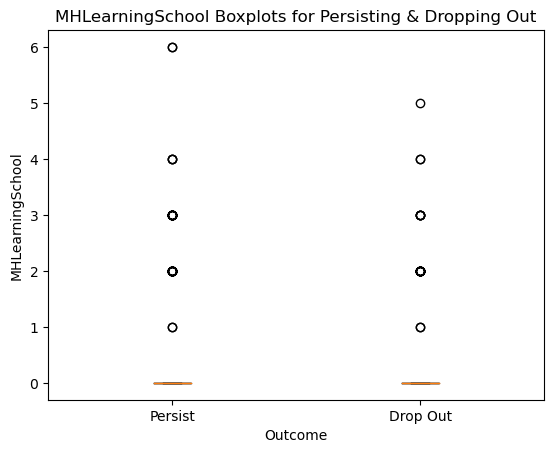

In [248]:
significant_features = ['PathologyScore', 'SocioeconomicScore', 'MHNeurodevelopmental', 'MHPsychiatric', 'MHFamilyEnvironment', 'MHSocialBehavioral', 'MHLearningSchool']

# Create boxplots of the significant features for each class
plt.figure(figsize=(10, 6))
for feature in significant_features:
    plt.boxplot([X.loc[y == 0, feature], X.loc[y == 1, feature]], labels=['Persist', 'Drop Out'])
    plt.xlabel('Outcome')
    plt.ylabel(feature)
    plt.title(f'{feature} Boxplots for Persisting & Dropping Out')
    plt.show()

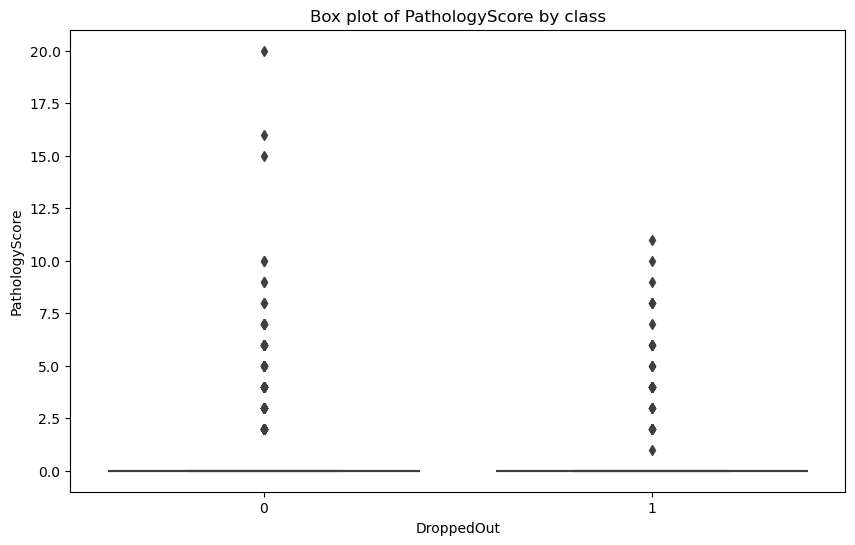

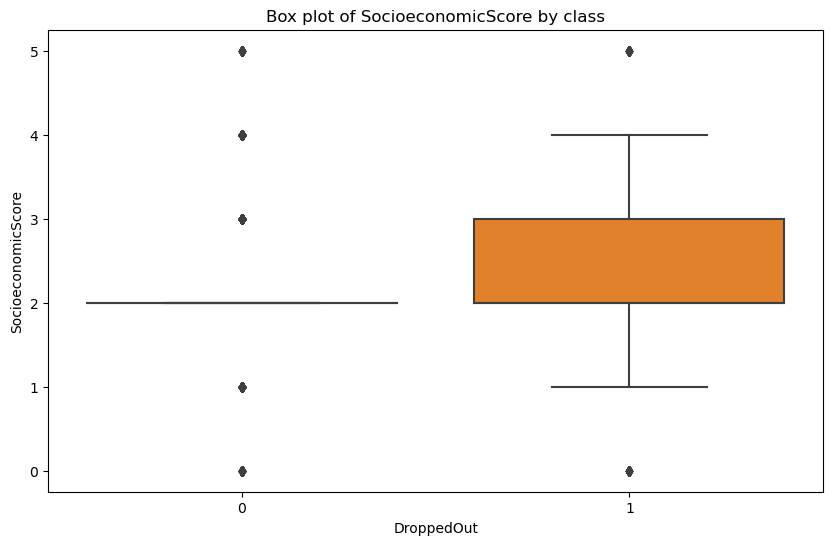

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ['PathologyScore', 'SocioeconomicScore']  # replace with your features

# For each feature, we create a separate box plot for each class
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='DroppedOut', y=feature, data=df)
    plt.title('Box plot of {} by class'.format(feature))
    plt.show()